In [1]:
import math
import numpy as np

import os, datetime
from time import sleep

from pprint import pprint

import matplotlib.pyplot as plt
from matplotlib  import cm

class pAER:
	def __init__(self, filename, max_events=1e6):
		self.filename = filename
		self.max_events = max_events
		self.load()

	def load(self):
		with open(self.filename, 'r') as f:
			line = f.readline()
			while (line[0] == '#'):
				if (line[0:9] == '#!AER-DAT'):
					aer_version = line[9];
				current = f.tell();
				line = f.readline()


			if (aer_version != '2'):
				raise Exception('Invalid AER version. Expected 2, got %s' % aer_version)

			f.seek(0,2)
			numEvents = math.floor( ( f.tell() - current ) / 8 )
			
			if numEvents > self.max_events:
				print 'There are %i events, but max_events is set to %i. Will only use %i events.' % (numEvents, self.max_events, self.max_events)
				numEvents = self.max_events

			f.seek(current)

			self.timestamps = np.zeros( numEvents )
			self.data       = np.zeros( numEvents )

			for i in range(numEvents):

				self.data[i] = int(f.read(4).encode('hex'), 16)
				self.timestamps[i]       = int(f.read(4).encode('hex'), 16)

			return self

	def unpackData(self, data):
		noData = len(data)
		
		x = np.zeros(noData)
		y = np.zeros(noData)
		t = np.zeros(noData)

		for i in range(noData):
			d = int(data[i])
			
			t[i] = d & 0x1			
			x[i] = 128-((d >> 0x1) & 0x7F)
			y[i] = (d >> 0x8) & 0x7F
		return (x,y,t)

In [13]:
hello = pAER('/Users/darioml/src/fyp-aedata-matlab/left_to_right_1.aedat', max_events=370000)

(x,y,t) = hello.unpackData(hello.data)


There are 1682339 events, but max_events is set to 370000. Will only use 370000 events.


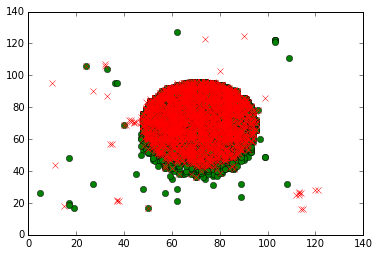

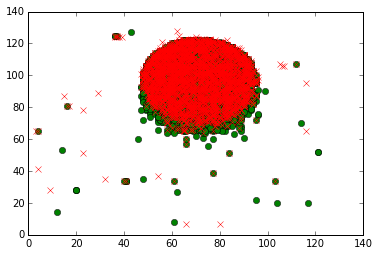

In [14]:
%matplotlib inline

on = np.where(t[0:10000] == 1)
off= np.where(t[0:10000] == 0)

plt.plot(y[on],x[on], 'og')
plt.plot(y[off],x[off], 'xr')	
plt.show()

x=x[126000:136000]
y=y[126000:136000]
t=t[126000:136000]

on = np.where(t[0:10000] == 1)
off= np.where(t[0:10000] == 0)

plt.plot(y[on],x[on], 'og')
plt.plot(y[off],x[off], 'xr')	
plt.show()


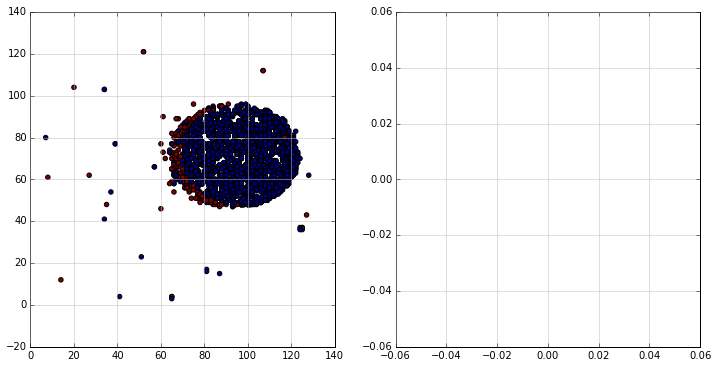

In [20]:
%matplotlib inline

fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(121)
ax.grid(True,linestyle='-',color='0.75')
ax.scatter(x[0:5000],y[0:5000],s=20,c=t[0:5000], marker = 'o', cmap = cm.jet );


ax2 = fig.add_subplot(122)
ax2.grid(True,linestyle='-',color='0.75')
ax2.scatter(x[240000:245000],y[240000:245000],s=20,c=t[240000:245000], marker = 'o', cmap = cm.jet );


plt.show()



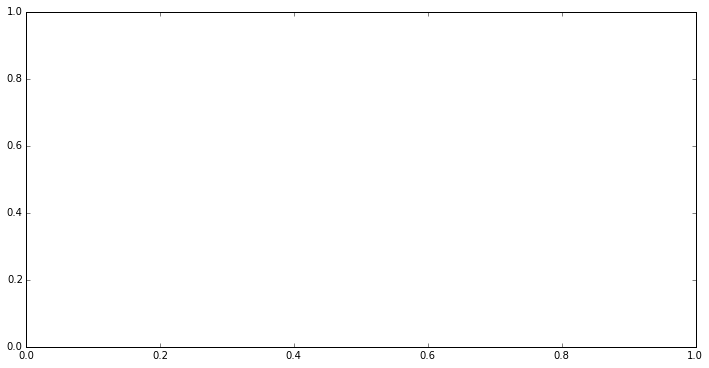

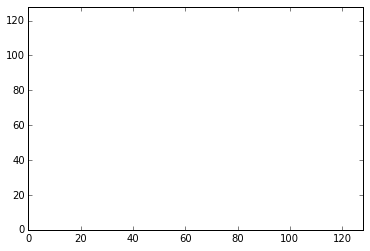

In [21]:

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

plt.ion()
plt.show()

start = 0;
step = 5000;
end = step-1;

for i in range(10):
    sleep(0.2)

    plt.clf()
    plt.scatter(x[start:end],y[start:end],s=20,c=t[start:end], marker = 'o', cmap = cm.jet );
    start = start + 5000;
    end   = end   + 5000;
    plt.draw()
    plt.xlim([0,128])
    plt.ylim([0,128])



# plt.plot(y[95000:99999],x[95000:99999], 'x')
# plt.show()

In [28]:
%matplotlib inline

import imp
import math
from pprint import pprint

pAER = imp.load_source('pAER', '/Users/darioml/src/python-aer-lib/pAER.py')



hello = pAER.pAER('/Users/darioml/src/fyp-aedata-matlab/left_to_right_1.aedat', max_events=1000000)
(x,y,t) = hello.unpackData(hello.data)


There are 1682339 events, but max_events is set to 1000000. Will only use 1000000 events.


In [62]:
downsample_rate = 64

test = np.random.randint(0,len(hello.data),math.floor(len(hello.data)/downsample_rate))
test.sort()

(x,y,t) = hello.unpackData(test)